# **Ejemplo de KNN con el dataset Magic **

In [1]:
import pandas as pd
url = (
     "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
 )
magic = pd.read_csv(url, header=None)

In [2]:
magic.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
magic.columns = [
     "fLenght",
     "fWidth",
     "fZise",
     "fConc",
     "fConc1",
     "fAsym",
     "fM3Long",
     "fM3Trans",
     "fAlpha",
     "fDist",
     "Class"
 ]

In [4]:
magic = magic.drop("Class", axis=1)

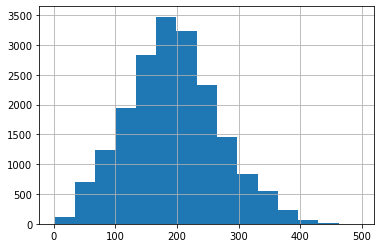

In [5]:
import matplotlib.pyplot as plt
magic["fDist"].hist(bins=15)
plt.show()

In [6]:
correlation_matrix = magic.corr()
correlation_matrix["fDist"]

fLenght     0.418466
fWidth      0.336816
fZise       0.437041
fConc      -0.328332
fConc1     -0.304625
fAsym      -0.206730
fM3Long     0.037025
fM3Trans    0.011427
fAlpha     -0.220556
fDist       1.000000
Name: fDist, dtype: float64

In [7]:
import numpy as np
a = np.array([2, 2])
b = np.array([4, 4])
np.linalg.norm(a - b)

2.8284271247461903

In [8]:
X = magic.drop("fDist", axis=1)
X = X.values
y = magic["fDist"]
y = y.values

In [11]:
new_data_point = np.array([
     0.418466,
     0.336816,
     0.437041,
    -0.328332,
    -0.304625,
    -0.206730,
     0.037025,
     0.011427,
    -0.220556,
])

In [12]:
distances = np.linalg.norm(X - new_data_point, axis=1)

In [15]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([14100,  9236, 12155])

In [16]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([200.2925, 105.236 , 105.169 ])

In [17]:
prediction = nearest_neighbor_rings.mean()

In [18]:
import scipy.stats
class_neighbors = np.array(["A", "B", "B", "C"])
scipy.stats.mode(class_neighbors)

ModeResult(mode=array(['B'], dtype='<U1'), count=array([2]))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=12345
 )

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

In [21]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

45.46166377270271

In [23]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

63.59879066200393

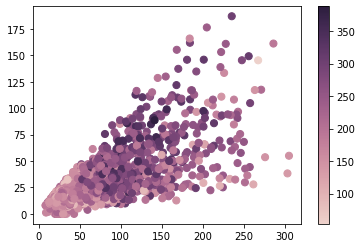

In [24]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
 )
f.colorbar(points)
plt.show()

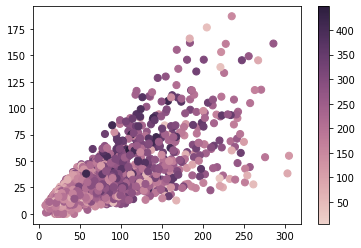

In [25]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
 )
f.colorbar(points)
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [27]:
gridsearch.best_params_

{'n_neighbors': 31}

In [31]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

56.55027963892363

In [32]:
test_rmse

57.55178197083795

In [43]:
parameters = {
     "n_neighbors": range(1, 50),
     "weights": ["uniform", "distance"],
 }
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [44]:
gridsearch.best_params_

{'n_neighbors': 39, 'weights': 'distance'}

In [45]:
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

56.924681518166736

In [46]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
     n_neighbors=best_k, weights=best_weights
 )

In [47]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [52]:

test_preds_grid = bagging_model.predict(X_test)
tst_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

NotFittedError: ignored

In [54]:
bagging_model.predict

<bound method BaggingRegressor.predict of BaggingRegressor(base_estimator=KNeighborsRegressor(n_neighbors=39,
                                                    weights='distance'),
                 n_estimators=100)>